# Capstone Phase 2  
Let's plot some results from our tests.  First, we'll load the classification reports.

## Import libraries

In [14]:
from google.colab import files
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Upload data files

In [2]:
ig_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_ig.pkl')

Saving rep_dict_ann_adamax_ig.pkl to rep_dict_ann_adamax_ig.pkl


In [3]:
anova_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_anova.pkl')

Saving rep_dict_ann_adamax_anova.pkl to rep_dict_ann_adamax_anova.pkl


In [4]:
vt_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_vt.pkl')

Saving rep_dict_ann_adamax_vt.pkl to rep_dict_ann_adamax_vt.pkl


In [5]:
mad_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_mad.pkl')

Saving rep_dict_ann_adamax_mad.pkl to rep_dict_ann_adamax_mad.pkl


In [6]:
corr_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_corr.pkl')

Saving rep_dict_ann_adamax_corr.pkl to rep_dict_ann_adamax_corr.pkl


In [7]:
RF_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_RF.pkl')

Saving rep_dict_ann_adamax_RF.pkl to rep_dict_ann_adamax_RF.pkl


## Load Classification Reports

In [10]:
rep_dict_ann_adamax_ig = joblib.load('rep_dict_ann_adamax_ig.pkl')
rep_dict_ann_adamax_anova = joblib.load('rep_dict_ann_adamax_anova.pkl')
rep_dict_ann_adamax_vt = joblib.load('rep_dict_ann_adamax_vt.pkl')
rep_dict_ann_adamax_mad = joblib.load('rep_dict_ann_adamax_mad.pkl')
rep_dict_ann_adamax_corr = joblib.load('rep_dict_ann_adamax_corr.pkl')
rep_dict_ann_adamax_RF = joblib.load('rep_dict_ann_adamax_RF.pkl')

## Plot F1 Scores  
Let's look at the class F1 scores from each feature subset.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

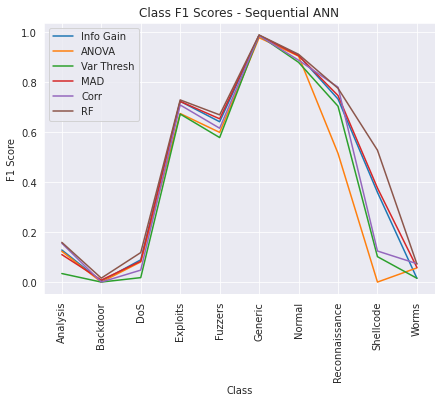

In [13]:
ann_reports = [rep_dict_ann_adamax_ig, rep_dict_ann_adamax_anova, rep_dict_ann_adamax_vt, 
               rep_dict_ann_adamax_mad, rep_dict_ann_adamax_corr, rep_dict_ann_adamax_RF]
ann_lgnds = ['Info Gain', 'ANOVA', 'Var Thresh', 'MAD', 'Corr', 'RF']
labels = ['0', '1', '2', '3','4', '5', '6', '7', '8', '9']
class_names = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 
               'Generic', 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('darkgrid')

for report, lgnd in zip(ann_reports, ann_lgnds):
    f1_scores = []
    for lab in labels:
        f1_scores.append(report[lab]['f1-score'])
    sns.lineplot(x=class_names, y=f1_scores, label=lgnd)
plt.xlabel('Class')
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('F1 Score')
plt.title('Class F1 Scores - Sequential ANN')
plt.legend()
plt.savefig('class_f1s_ann.png', dpi=300, bbox_inches='tight')
files.download('class_f1s_ann.png')
plt.show()

## Plot Accuracy  
Plot accuracy and weighted average F1 scores for each feature subset.

In [15]:
# let's grab come metrics so we can plot them togther
ann_acc = [('Accuracy', 'Info Gain', rep_dict_ann_adamax_ig['accuracy']),
           ('Accuracy', 'ANOVA', rep_dict_ann_adamax_anova['accuracy']),
           ('Accuracy', 'Var Thresh', rep_dict_ann_adamax_vt['accuracy']),
           ('Accuracy', 'MAD', rep_dict_ann_adamax_mad['accuracy']),
           ('Accuracy', 'Corr', rep_dict_ann_adamax_corr['accuracy']),
           ('Accuracy', 'RF', rep_dict_ann_adamax_RF['accuracy']),
           ('Weighted Avg F1', 'Info Gain', rep_dict_ann_adamax_ig['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'ANOVA', rep_dict_ann_adamax_anova['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'Var Thresh', rep_dict_ann_adamax_vt['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'MAD', rep_dict_ann_adamax_mad['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'Corr', rep_dict_ann_adamax_corr['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'RF', rep_dict_ann_adamax_RF['weighted avg']['f1-score'])]
ann_metric_df = pd.DataFrame(ann_acc, columns=['Metric', 'Feature Subset', 'Score'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

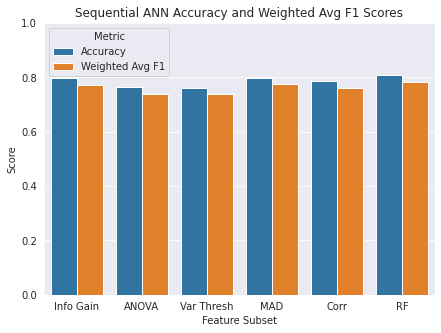

In [16]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
ann_metric_chart = sns.barplot(x='Feature Subset', y='Score', hue='Metric', data=ann_metric_df)
ann_metric_chart.set_title('Sequential ANN Accuracy and Weighted Avg F1 Scores')
plt.ylim(ymax=1.0)
plt.savefig('feat_subset_acc_f1_ann.png', dpi=300, bbox_inches='tight')
files.download('feat_subset_acc_f1_ann.png')
plt.show()

# Plot final results

In [1]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Reports

### Naive Bayes reports

In [2]:
# classification reports
final_rep_dict_gnb_ig = joblib.load('./data/final_rep_dict_gnb_ig.pkl')
final_rep_dict_gnb_anova = joblib.load('./data/final_rep_dict_gnb_anova.pkl')
final_rep_dict_gnb_vt = joblib.load('./data/final_rep_dict_gnb_vt.pkl')
final_rep_dict_gnb_mad = joblib.load('./data/final_rep_dict_gnb_mad.pkl')
final_rep_dict_gnb_corr = joblib.load('./data/final_rep_dict_gnb_corr.pkl')
final_rep_dict_gnb_RF = joblib.load('./data/final_rep_dict_gnb_RF.pkl')

In [25]:
gnb_reports = [final_rep_dict_gnb_ig, final_rep_dict_gnb_anova, final_rep_dict_gnb_vt, 
               final_rep_dict_gnb_mad, final_rep_dict_gnb_corr, final_rep_dict_gnb_RF]

### K Nearest Neighbors reports

In [4]:
# classification reports
final_rep_dict_knn_ig = joblib.load('./data/final_rep_dict_knn_ig.pkl')
final_rep_dict_knn_anova = joblib.load('./data/final_rep_dict_knn_anova.pkl')
final_rep_dict_knn_vt = joblib.load('./data/final_rep_dict_knn_vt.pkl')
final_rep_dict_knn_mad = joblib.load('./data/final_rep_dict_knn_mad.pkl')
final_rep_dict_knn_corr = joblib.load('./data/final_rep_dict_knn_corr.pkl')
final_rep_dict_knn_RF = joblib.load('./data/final_rep_dict_knn_RF.pkl')

In [26]:
knn_reports = [final_rep_dict_knn_ig, final_rep_dict_knn_anova, final_rep_dict_knn_vt, 
               final_rep_dict_knn_mad, final_rep_dict_knn_corr, final_rep_dict_knn_RF]

### SVM reports

In [5]:
# classification reports
final_rep_dict_svc_ig = joblib.load('./data/final_rep_dict_svc_ig.pkl')
final_rep_dict_svc_anova = joblib.load('./data/final_rep_dict_svc_anova.pkl')
final_rep_dict_svc_vt = joblib.load('./data/final_rep_dict_svc_vt.pkl')
final_rep_dict_svc_mad = joblib.load('./data/final_rep_dict_svc_mad.pkl')
final_rep_dict_svc_corr = joblib.load('./data/final_rep_dict_svc_corr.pkl')
final_rep_dict_svc_RF = joblib.load('./data/final_rep_dict_svc_RF.pkl')

In [27]:
svc_reports = [final_rep_dict_svc_ig, final_rep_dict_svc_anova, final_rep_dict_svc_vt, 
               final_rep_dict_svc_mad, final_rep_dict_svc_corr, final_rep_dict_svc_RF]

### Random Forest reports

In [10]:
# classification reports
final_rep_dict_rf_ig = joblib.load('./data/final_rep_dict_rf_ig.pkl')
final_rep_dict_rf_anova = joblib.load('./data/final_rep_dict_rf_anova.pkl')
final_rep_dict_rf_vt = joblib.load('./data/final_rep_dict_rf_vt.pkl')
final_rep_dict_rf_mad = joblib.load('./data/final_rep_dict_rf_mad.pkl')
final_rep_dict_rf_corr = joblib.load('./data/final_rep_dict_rf_corr.pkl')
final_rep_dict_rf_rfe = joblib.load('./data/final_rep_dict_rf_rfe.pkl')
final_rep_dict_rf_RF = joblib.load('./data/final_rep_dict_rf_RF.pkl')
final_rep_dict_rf_all = joblib.load('./data/final_rep_dict_rf_all.pkl')

In [28]:
rf_reports = [final_rep_dict_rf_ig, final_rep_dict_rf_anova, final_rep_dict_rf_vt, 
               final_rep_dict_rf_mad, final_rep_dict_rf_corr, final_rep_dict_rf_RF, final_rep_dict_rf_all]

### ANN reports

In [7]:
# classification reports
final_rep_dict_ann_ig = joblib.load('./data/final_rep_dict_ann_ig.pkl')
final_rep_dict_ann_anova = joblib.load('./data/final_rep_dict_ann_anova.pkl')
final_rep_dict_ann_vt = joblib.load('./data/final_rep_dict_ann_vt.pkl')
final_rep_dict_ann_mad = joblib.load('./data/final_rep_dict_ann_mad.pkl')
final_rep_dict_ann_corr = joblib.load('./data/final_rep_dict_ann_corr.pkl')
final_rep_dict_ann_RF = joblib.load('./data/final_rep_dict_ann_RF.pkl')

In [29]:
ann_reports = [final_rep_dict_ann_ig, final_rep_dict_ann_anova, final_rep_dict_ann_vt, 
               final_rep_dict_ann_mad, final_rep_dict_ann_corr, final_rep_dict_ann_RF]

In [8]:
# optuna model classification reports
final_rep_dict_ann_ig_optuna = joblib.load('./data/final_rep_dict_ann_ig_optuna.pkl')
final_rep_dict_ann_anova_optuna = joblib.load('./data/final_rep_dict_ann_anova_optuna.pkl')
final_rep_dict_ann_vt_optuna = joblib.load('./data/final_rep_dict_ann_vt_optuna.pkl')
final_rep_dict_ann_mad_optuna = joblib.load('./data/final_rep_dict_ann_mad_optuna.pkl')
final_rep_dict_ann_corr_optuna = joblib.load('./data/final_rep_dict_ann_corr_optuna.pkl')
final_rep_dict_ann_RF_optuna = joblib.load('./data/final_rep_dict_ann_RF_optuna.pkl')
final_rep_dict_ann_full_optuna = joblib.load('./data/final_rep_dict_ann_full_optuna.pkl')

In [30]:
ann_opt_reports = [final_rep_dict_ann_ig_optuna, final_rep_dict_ann_anova_optuna, final_rep_dict_ann_vt_optuna, 
                   final_rep_dict_ann_mad_optuna, final_rep_dict_ann_corr_optuna, final_rep_dict_ann_RF_optuna, final_rep_dict_ann_full_optuna]

## Plot Metrics

### Accuracy

In [55]:
acc_dict = {'Naive Bayes':[x['accuracy'] for x in gnb_reports],
            'K-Nearest':[x['accuracy'] for x in knn_reports],
            'Linear SVC':[x['accuracy'] for x in svc_reports],
            'Random Forest':[x['accuracy'] for x in rf_reports],
            'ANN':[x['accuracy'] for x in ann_reports],
            'ANN - Optuna':[x['accuracy'] for x in ann_opt_reports]}

In [56]:
model_accuracy = pd.DataFrame.from_dict(data=acc_dict, orient='index', 
                                        columns=['Info Gain', 'ANOVA', 'Var Thresh', 'MAD', 'Corr', 'RF', 'All'])

In [57]:
model_accuracy

,Info Gain,ANOVA,Var Thresh,MAD,Corr,RF,All
Naive Bayes,0.461935,0.495579,0.506304,0.480554,0.449400,0.358828,NaN
K-Nearest,0.708036,0.619686,0.555349,0.679614,0.711801,0.718639,NaN
Linear SVC,0.577673,0.575924,0.580236,0.571770,0.508041,0.663011,NaN
Random Forest,0.559685,0.620293,0.394828,0.417493,0.656889,0.644889,0.419946
ANN,0.676966,0.593050,0.653585,0.642387,0.645691,0.742591,NaN
ANN - Optuna,0.633581,0.616747,0.665112,0.692683,0.720170,0.753073,0.456481


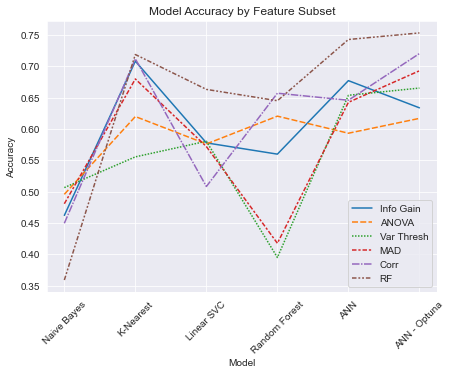

In [58]:
acc = model_accuracy.drop('All', axis=1)

fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('darkgrid')

sns.lineplot(data=acc)
plt.xlabel('Model')
plt.xticks(rotation=45, horizontalalignment='center')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Feature Subset')
plt.legend()
plt.savefig('./images/final_model_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

### Precision

In [31]:
prec_dict = {'Naive Bayes':[x['weighted avg']['precision'] for x in gnb_reports],
             'K-Nearest':[x['weighted avg']['precision'] for x in knn_reports],
             'Linear SVC':[x['weighted avg']['precision'] for x in svc_reports],
             'Random Forest':[x['weighted avg']['precision'] for x in rf_reports],
             'ANN':[x['weighted avg']['precision'] for x in ann_reports],
             'ANN - Optuna':[x['weighted avg']['precision'] for x in ann_opt_reports]}

In [35]:
model_precision = pd.DataFrame.from_dict(data=prec_dict, orient='index', 
                                         columns=['Info Gain', 'ANOVA', 'Var Thresh', 'MAD', 'Corr', 'RF', 'All'])

In [36]:
model_precision

,Info Gain,ANOVA,Var Thresh,MAD,Corr,RF,All
Naive Bayes,0.723723,0.693555,0.635957,0.723833,0.201960,0.707147,NaN
K-Nearest,0.784846,0.719614,0.736329,0.772454,0.771915,0.798613,NaN
Linear SVC,0.718078,0.718761,0.692176,0.700219,0.651695,0.813189,NaN
Random Forest,0.744651,0.760671,0.362543,0.417530,0.792511,0.749291,0.311767
ANN,0.743403,0.700642,0.794438,0.798201,0.782149,0.800678,NaN
ANN - Optuna,0.767406,0.726875,0.798724,0.728340,0.780512,0.796980,0.665477


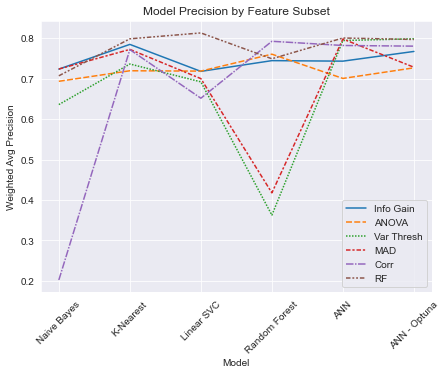

In [37]:
prec = model_precision.drop('All', axis=1)

fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('darkgrid')

sns.lineplot(data=prec)
plt.xlabel('Model')
plt.xticks(rotation=45, horizontalalignment='center')
plt.ylabel('Weighted Avg Precision')
plt.title('Model Precision by Feature Subset')
plt.legend()
plt.savefig('./images/final_model_precision.png', dpi=300, bbox_inches='tight')
plt.show()

### Recall

In [38]:
recall_dict = {'Naive Bayes':[x['weighted avg']['recall'] for x in gnb_reports],
               'K-Nearest':[x['weighted avg']['recall'] for x in knn_reports],
               'Linear SVC':[x['weighted avg']['recall'] for x in svc_reports],
               'Random Forest':[x['weighted avg']['recall'] for x in rf_reports],
               'ANN':[x['weighted avg']['recall'] for x in ann_reports],
               'ANN - Optuna':[x['weighted avg']['recall'] for x in ann_opt_reports]}

In [39]:
model_recall = pd.DataFrame.from_dict(data=recall_dict, orient='index', 
                                      columns=['Info Gain', 'ANOVA', 'Var Thresh', 'MAD', 'Corr', 'RF', 'All'])

In [40]:
model_recall

,Info Gain,ANOVA,Var Thresh,MAD,Corr,RF,All
Naive Bayes,0.461935,0.495579,0.506304,0.480554,0.449400,0.358828,NaN
K-Nearest,0.708036,0.619686,0.555349,0.679614,0.711801,0.718639,NaN
Linear SVC,0.577673,0.575924,0.580236,0.571770,0.508041,0.663011,NaN
Random Forest,0.559685,0.620293,0.394828,0.417493,0.656889,0.644889,0.419946
ANN,0.676966,0.593050,0.653585,0.642387,0.645691,0.742591,NaN
ANN - Optuna,0.633581,0.616747,0.665112,0.692683,0.720170,0.753073,0.456481


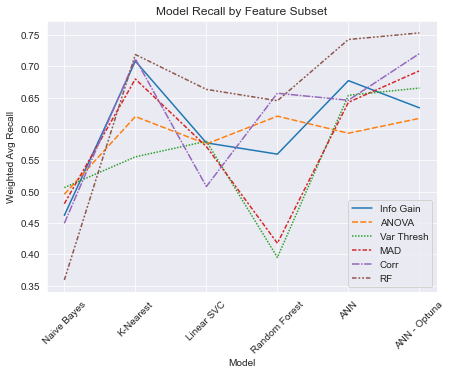

In [41]:
recall = model_recall.drop('All', axis=1)

fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('darkgrid')

sns.lineplot(data=recall)
plt.xlabel('Model')
plt.xticks(rotation=45, horizontalalignment='center')
plt.ylabel('Weighted Avg Recall')
plt.title('Model Recall by Feature Subset')
plt.legend()
plt.savefig('./images/final_model_recall.png', dpi=300, bbox_inches='tight')
plt.show()

### F1 Score

In [48]:
f1_dict = {'Naive Bayes':[x['weighted avg']['f1-score'] for x in gnb_reports],
           'K-Nearest':[x['weighted avg']['f1-score'] for x in knn_reports],
           'Linear SVC':[x['weighted avg']['f1-score'] for x in svc_reports],
           'Random Forest':[x['weighted avg']['f1-score'] for x in rf_reports],
           'ANN':[x['weighted avg']['f1-score'] for x in ann_reports],
           'ANN - Optuna':[x['weighted avg']['f1-score'] for x in ann_opt_reports]}

In [49]:
model_f1 = pd.DataFrame.from_dict(data=f1_dict, orient='index', 
                                  columns=['Info Gain', 'ANOVA', 'Var Thresh', 'MAD', 'Corr', 'RF', 'All'])

In [50]:
model_f1

,Info Gain,ANOVA,Var Thresh,MAD,Corr,RF,All
Naive Bayes,0.518988,0.535120,0.516106,0.542775,0.278681,0.302485,NaN
K-Nearest,0.733110,0.649677,0.607089,0.712865,0.729613,0.743351,NaN
Linear SVC,0.612958,0.621582,0.596600,0.599085,0.540334,0.701184,NaN
Random Forest,0.591693,0.649226,0.350194,0.377133,0.686796,0.666409,0.331877
ANN,0.687107,0.603539,0.673687,0.685996,0.659057,0.748197,NaN
ANN - Optuna,0.662533,0.633070,0.678138,0.692632,0.728208,0.756952,0.490140


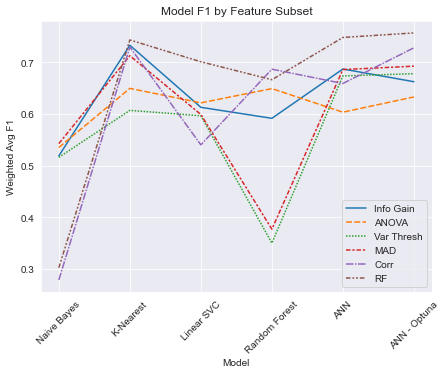

In [54]:
f1 = model_f1.drop('All', axis=1)

fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('darkgrid')

sns.lineplot(data=f1)
plt.xlabel('Model')
plt.xticks(rotation=45, horizontalalignment='center')
plt.ylabel('Weighted Avg F1')
plt.title('Model F1 by Feature Subset')
plt.legend()
plt.savefig('./images/final_model_f1.png', dpi=300, bbox_inches='tight')
plt.show()

## ANN Confusion Matrices

In [ ]:
from google.colab import files
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.preprocessing import StandardScaler

In [2]:
# confusion matrices
final_conf_mat_ann_ig = joblib.load('./data/final_conf_mat_ann_ig.pkl')
final_conf_mat_ann_anova = joblib.load('./data/final_conf_mat_ann_anova.pkl')
final_conf_mat_ann_vt = joblib.load('./data/final_conf_mat_ann_vt.pkl')
final_conf_mat_ann_mad = joblib.load('./data/final_conf_mat_ann_mad.pkl')
final_conf_mat_ann_corr = joblib.load('./data/final_conf_mat_ann_corr.pkl')
final_conf_mat_ann_RF = joblib.load('./data/final_conf_mat_ann_RF.pkl')

In [3]:
ann_conf_mats = [final_conf_mat_ann_ig, final_conf_mat_ann_anova, final_conf_mat_ann_vt, 
                 final_conf_mat_ann_mad, final_conf_mat_ann_corr, final_conf_mat_ann_RF]

In [4]:
# optuna model confusion matrices
final_conf_mat_ann_ig_optuna = joblib.load('./data/final_conf_mat_ann_ig_optuna.pkl')
final_conf_mat_ann_anova_optuna = joblib.load('./data/final_conf_mat_ann_anova_optuna.pkl')
final_conf_mat_ann_vt_optuna = joblib.load('./data/final_conf_mat_ann_vt_optuna.pkl')
final_conf_mat_ann_mad_optuna = joblib.load('./data/final_conf_mat_ann_mad_optuna.pkl')
final_conf_mat_ann_corr_optuna = joblib.load('./data/final_conf_mat_ann_corr_optuna.pkl')
final_conf_mat_ann_RF_optuna = joblib.load('./data/final_conf_mat_ann_RF_optuna.pkl')
final_conf_mat_ann_full_optuna = joblib.load('./data/final_conf_mat_ann_full_optuna.pkl')

In [5]:
ann_conf_mats_opt = [final_conf_mat_ann_ig_optuna, final_conf_mat_ann_anova_optuna, final_conf_mat_ann_vt_optuna, 
                     final_conf_mat_ann_mad_optuna, final_conf_mat_ann_corr_optuna, final_conf_mat_ann_RF_optuna, final_conf_mat_ann_full_optuna]

In [ ]:
class_names = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 
               'Generic', 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']
scaler = StandardScaler()

### Hand-tuned Model

In [33]:
confmat_ann_ig_df_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats[0]), index=class_names, columns=class_names)

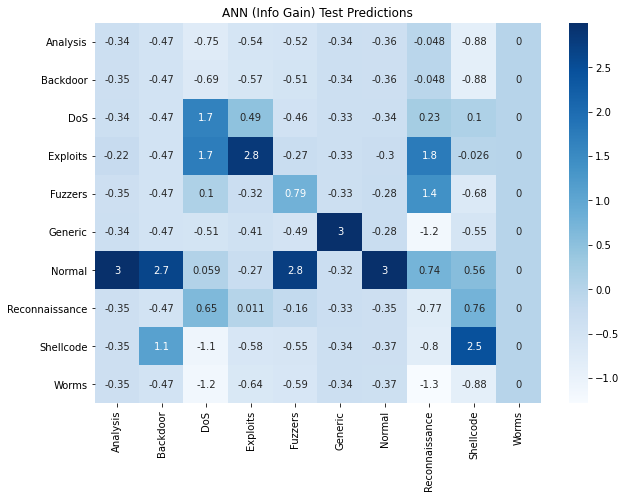

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_ig_df_norm, annot=True, cmap='Blues')
plt.title('ANN (Info Gain) Test Predictions')
plt.savefig('./images/final_ann_ig_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
confmat_ann_anova_df_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats[1]), index=class_names, columns=class_names)

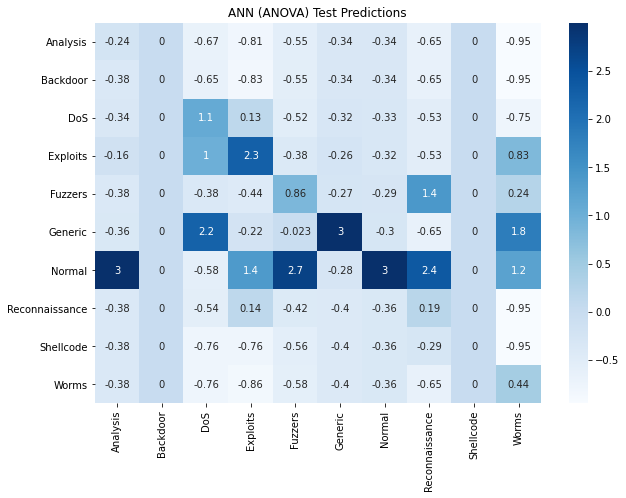

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_anova_df_norm, annot=True, cmap='Blues')
plt.title('ANN (ANOVA) Test Predictions')
plt.savefig('./images/final_ann_anova_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
confmat_ann_vt_df_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats[2]), index=class_names, columns=class_names)

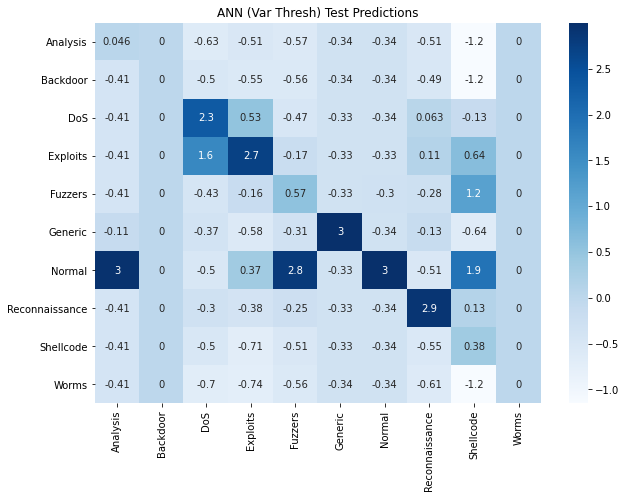

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_vt_df_norm, annot=True, cmap='Blues')
plt.title('ANN (Var Thresh) Test Predictions')
plt.savefig('./images/final_ann_vt_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
confmat_ann_mad_df_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats[3]), index=class_names, columns=class_names)

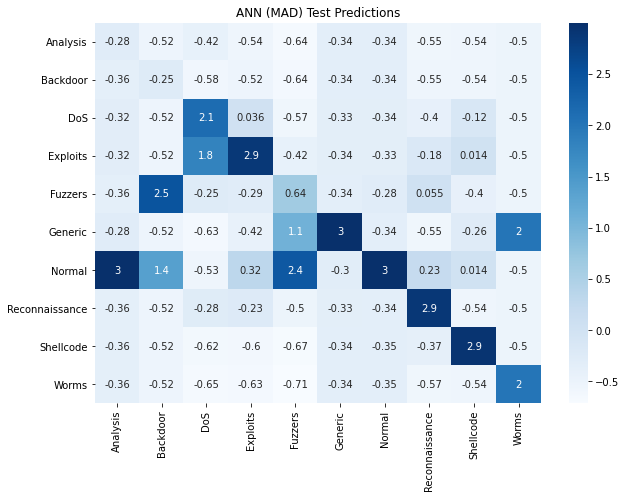

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_mad_df_norm, annot=True, cmap='Blues')
plt.title('ANN (MAD) Test Predictions')
plt.savefig('./images/final_ann_mad_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
confmat_ann_corr_df_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats[4]), index=class_names, columns=class_names)

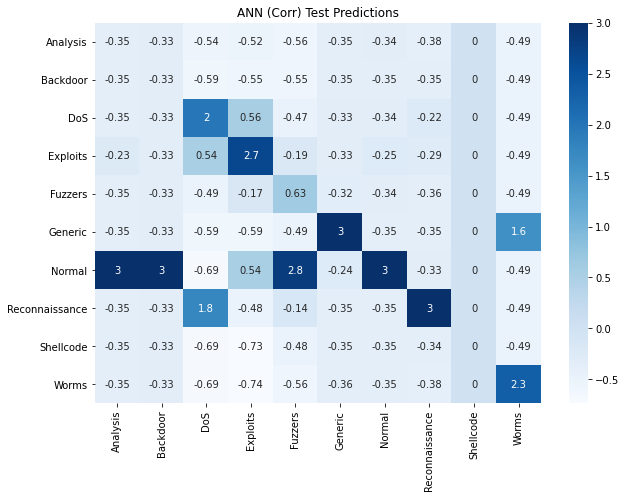

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_corr_df_norm, annot=True, cmap='Blues')
plt.title('ANN (Corr) Test Predictions')
plt.savefig('./images/final_ann_corr_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
confmat_ann_RF_df_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats[5]), index=class_names, columns=class_names)

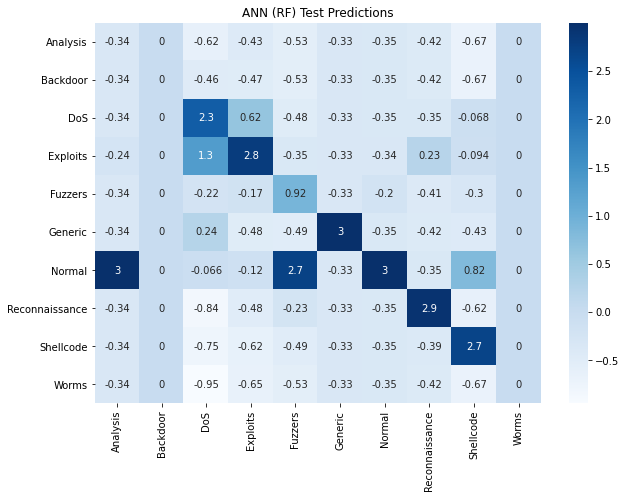

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_RF_df_norm, annot=True, cmap='Blues')
plt.title('ANN (RF) Test Predictions')
plt.savefig('./images/final_ann_RF_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

### Optuna Model

In [45]:
confmat_ann_ig_opt_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats_opt[0]), index=class_names, columns=class_names)

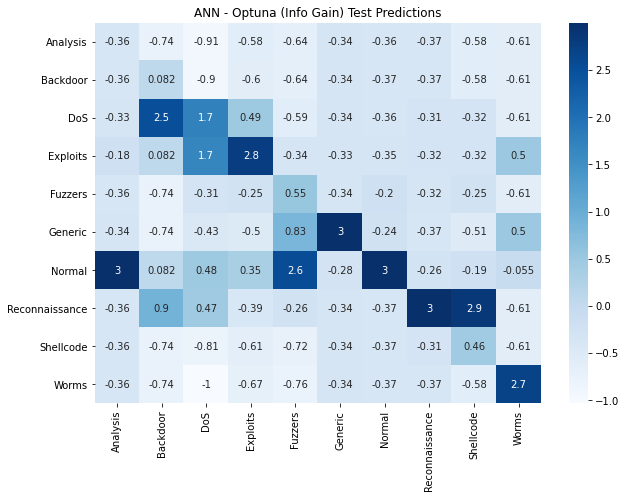

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_ig_opt_norm, annot=True, cmap='Blues')
plt.title('ANN - Optuna (Info Gain) Test Predictions')
plt.savefig('./images/final_ann_ig_opt_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
confmat_ann_anova_opt_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats_opt[1]), index=class_names, columns=class_names)

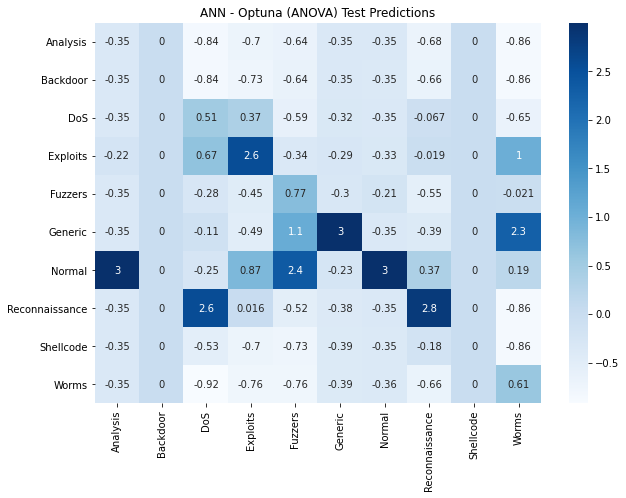

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_anova_opt_norm, annot=True, cmap='Blues')
plt.title('ANN - Optuna (ANOVA) Test Predictions')
plt.savefig('./images/final_ann_anova_opt_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
confmat_ann_vt_opt_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats_opt[2]), index=class_names, columns=class_names)

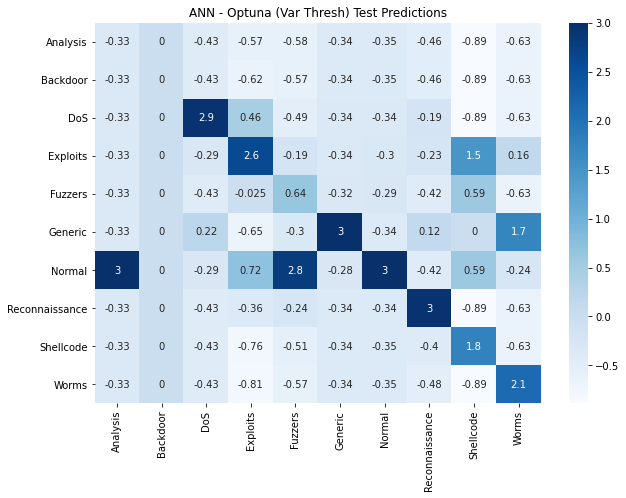

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_vt_opt_norm, annot=True, cmap='Blues')
plt.title('ANN - Optuna (Var Thresh) Test Predictions')
plt.savefig('./images/final_ann_vt_opt_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
confmat_ann_mad_opt_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats_opt[3]), index=class_names, columns=class_names)

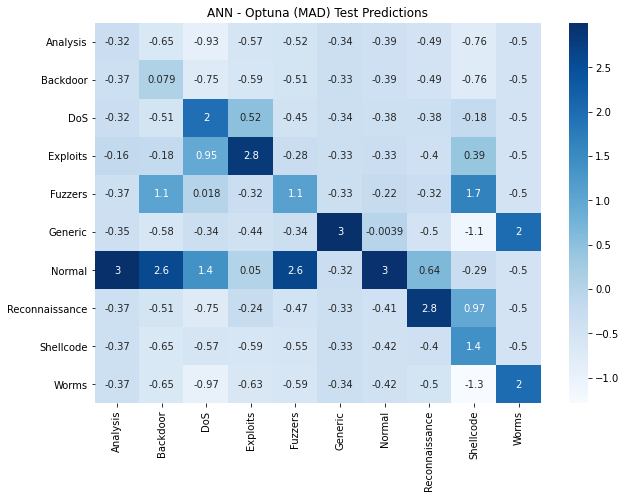

In [52]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_mad_opt_norm, annot=True, cmap='Blues')
plt.title('ANN - Optuna (MAD) Test Predictions')
plt.savefig('./images/final_ann_mad_opt_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
confmat_ann_corr_opt_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats_opt[4]), index=class_names, columns=class_names)

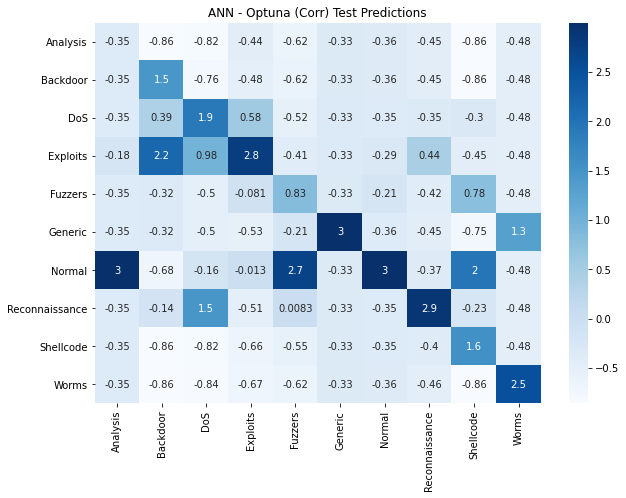

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_corr_opt_norm, annot=True, cmap='Blues')
plt.title('ANN - Optuna (Corr) Test Predictions')
plt.savefig('./images/final_ann_corr_opt_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
confmat_ann_RF_opt_norm = pd.DataFrame(scaler.fit_transform(ann_conf_mats_opt[5]), index=class_names, columns=class_names)

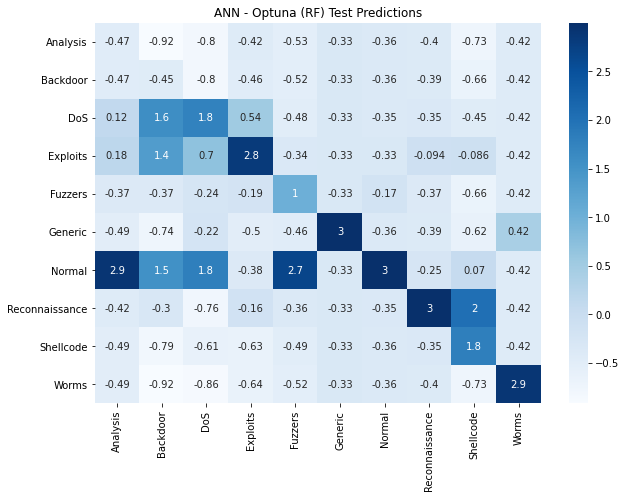

In [57]:
plt.figure(figsize=(10,7))
sns.heatmap(data=confmat_ann_RF_opt_norm, annot=True, cmap='Blues')
plt.title('ANN - Optuna (RF) Test Predictions')
plt.savefig('./images/final_ann_RF_opt_conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()